# Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import img_to_array, load_img
import sklearn.metrics as metrics
from yellowbrick.classifier import ROCAUC

In [18]:
batch_size = 128
num_classes = 10
epochs = 1

In [19]:
img_rows, img_cols = 28, 28

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

0 Data shape: (28, 28) ; Label: 5
1 Data shape: (28, 28) ; Label: 0
2 Data shape: (28, 28) ; Label: 4
3 Data shape: (28, 28) ; Label: 1
4 Data shape: (28, 28) ; Label: 9
5 Data shape: (28, 28) ; Label: 2
6 Data shape: (28, 28) ; Label: 1
7 Data shape: (28, 28) ; Label: 3
8 Data shape: (28, 28) ; Label: 1


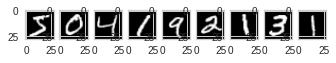

In [21]:
for i in range(0,9):
    print(i,'Data shape:',X_train[i].shape,'; Label:', y_train[i])
    plt.subplot(1,10,1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Preprocessing

In [22]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [23]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [24]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [25]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model

## Model 1

In [26]:
model_1 = Sequential([
                    Conv2D(filters=24, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(num_classes, activation='softmax')
])

In [27]:
model_1.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])

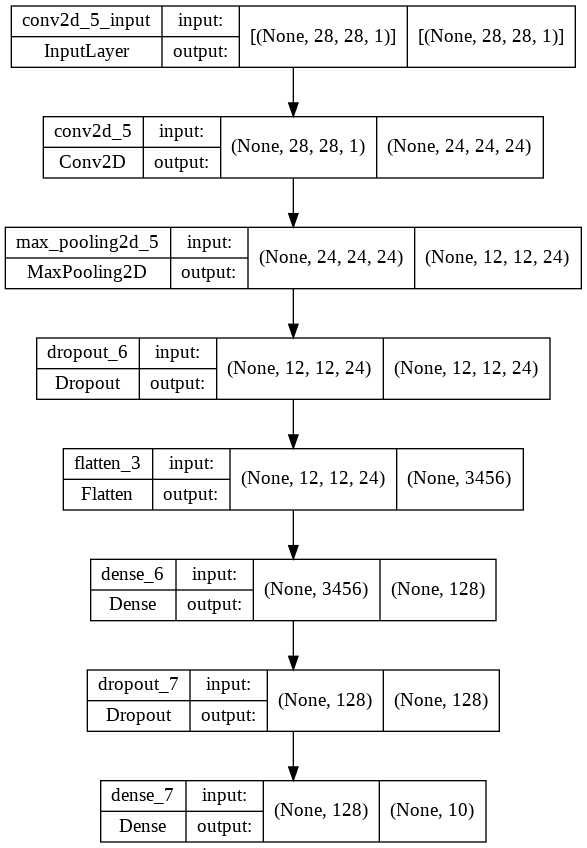

In [28]:
plot_model(model_1, to_file='model_plot.png', show_shapes=True)

In [29]:
model_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

469/469 [==============================] - 28s 58ms/step - loss: 0.3216 - accuracy: 0.9039 - val_loss: 0.0773 - val_accuracy: 0.9769


In [30]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07733133435249329
Test accuracy: 0.9768999814987183


In [31]:
y_pred=model_1.predict(X_test)

In [33]:
y_pred=(y_pred>0.5)

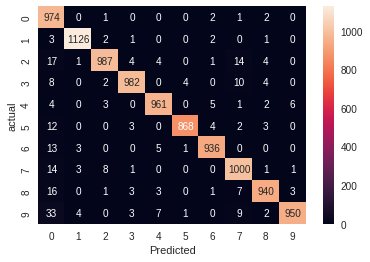

In [37]:
sns.heatmap(metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.94      0.96      1009

   micro avg       0.98      0.97      0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.97      0.98     10000
 samples avg       0.97      0.97      0.97     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2

In [39]:
model_2 = Sequential([
                    Conv2D(filters=24, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=48, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(num_classes, activation='softmax')
])

In [41]:
model_2.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])

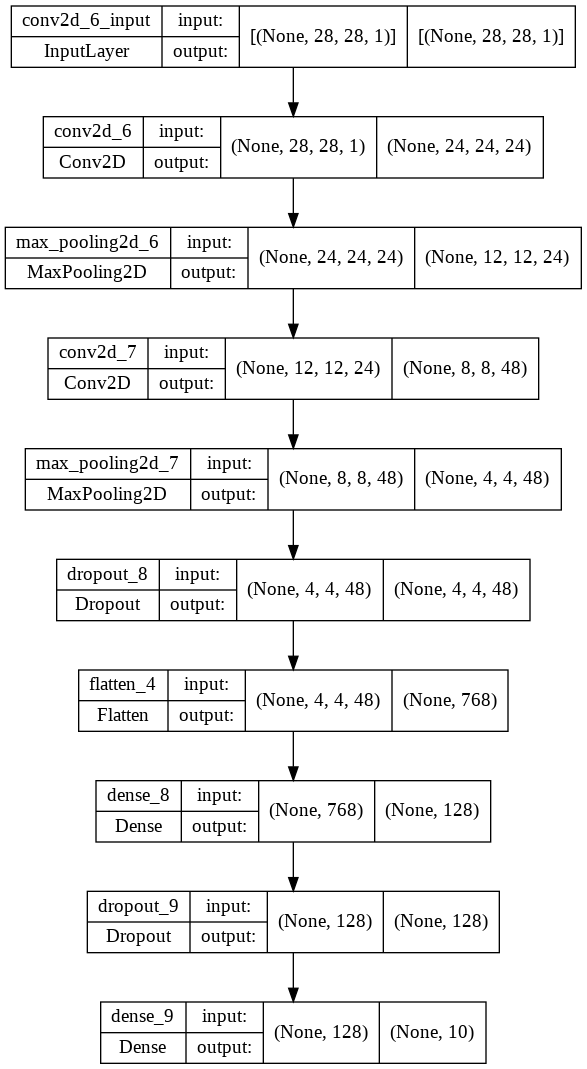

In [42]:
plot_model(model_2, to_file='model_2_plot.png', show_shapes=True)

In [43]:
model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

469/469 [==============================] - 49s 101ms/step - loss: 0.3417 - accuracy: 0.8938 - val_loss: 0.0659 - val_accuracy: 0.9795


In [44]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06591738015413284
Test accuracy: 0.9794999957084656


In [45]:
y_pred_2=(model_2.predict(X_test) > 0.5)

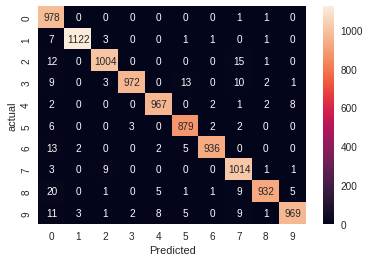

In [46]:
sns.heatmap(metrics.confusion_matrix(y_test.argmax(axis=1), y_pred_2.argmax(axis=1)), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.94      0.96      1009

   micro avg       0.98      0.97      0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.97      0.98     10000
 samples avg       0.97      0.97      0.97     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 3

In [52]:
model_3 = Sequential([
                    Conv2D(filters=24, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=48, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1, padding="same"),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=64, kernel_size=(5,5), input_shape=input_shape, activation="relu", strides=1),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(num_classes, activation='softmax')
])

In [53]:
model_3.compile(loss=categorical_crossentropy,optimizer='Adam',metrics=['accuracy'])

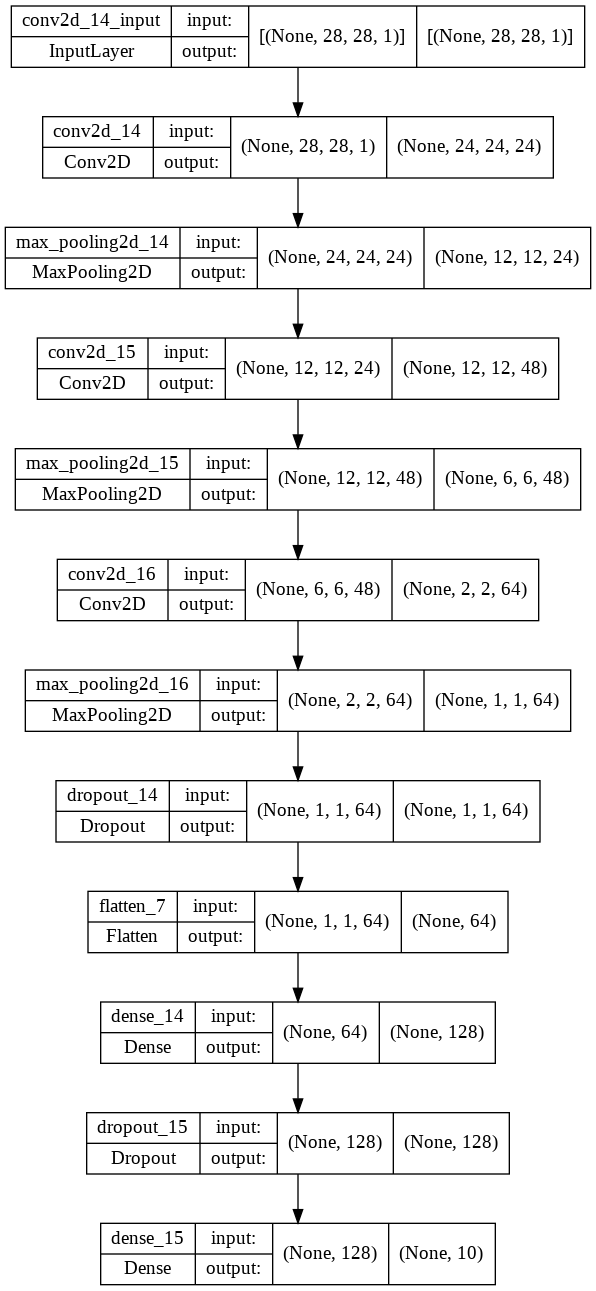

In [54]:
plot_model(model_3, to_file='model_3_plot.png', show_shapes=True)

In [55]:
model_3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

469/469 [==============================] - 73s 153ms/step - loss: 0.4021 - accuracy: 0.8715 - val_loss: 0.0624 - val_accuracy: 0.9815


In [57]:
score = model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0624200813472271
Test accuracy: 0.9815000295639038


In [58]:
y_pred_3=(model_3.predict(X_test) > 0.5)

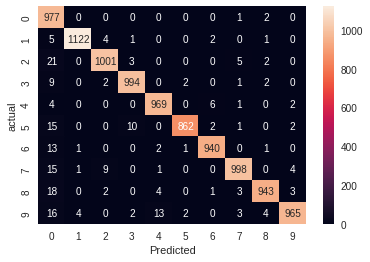

In [59]:
sns.heatmap(metrics.confusion_matrix(y_test.argmax(axis=1), y_pred_3.argmax(axis=1)), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.94      0.96      1009

   micro avg       0.98      0.97      0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.97      0.98     10000
 samples avg       0.97      0.97      0.97     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
